Note that these prognostic runs were without the radiative flux model.

In [1]:
import vcm
import xarray as xr
import fsspec
import matplotlib.pyplot as plt
import json
plt.rcParams['figure.dpi'] = 110
xr.set_options(keep_attrs=True)

In [2]:
url_ic0 = 'gs://vcm-ml-experiments/default/2022-11-18/ml-on-fine-ensemble-prog-{seed}-trial-0/fv3gfs_run_diagnostics'
url_ic1 = 'gs://vcm-ml-experiments/default/2022-11-30/ml-on-fine-ensemble-prog-{seed}-trial-1/fv3gfs_run_diagnostics'

In [3]:
ds = []
for i, url_template in enumerate([url_ic0, url_ic1]):
    ds_ic = []
    for seed in range(10):
        url = url_template.format(seed=seed) + '/metrics.json'
        with fsspec.open(url) as f:
            tmp = json.load(f)
        tmp_ds = xr.Dataset({k: xr.DataArray(v['value'], attrs={'units': v['units']}) for k,v in tmp.items()})
        ds_ic.append(tmp_ds.assign_coords(seed=seed))
    ds.append(xr.concat(ds_ic, dim='seed').assign_coords(ic=i))
ds = xr.concat(ds, dim='ic')

In [4]:
def plot_scatter(da):
    fig, ax = plt.subplots()
    ax.scatter(da.isel(ic=0), da.isel(ic=1))
    ax.set_xlabel(f'Aug 5 initial condition [{da.units}]')
    ax.set_ylabel(f'Aug 15 initial condition [{da.units}]')
    ax.set_title(da.name)
    ax.set_aspect('equal')
    min_lim = min(ax.get_xlim()[0], ax.get_ylim()[0])
    max_lim = max(ax.get_xlim()[1], ax.get_ylim()[1])
    lims = [min_lim, max_lim]
    ax.set_xlim(lims)
    ax.set_ylim(lims)
    ax.plot(lims, lims, 'k', linewidth=0.8)

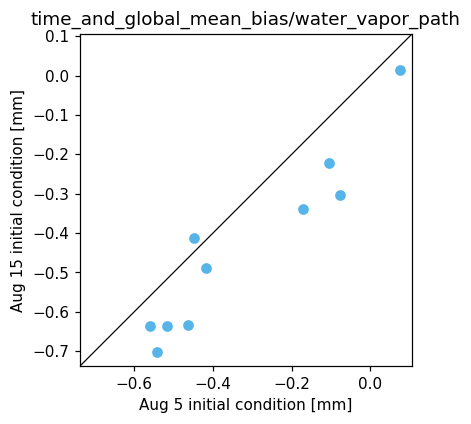

In [5]:
plot_scatter(ds['time_and_global_mean_bias/water_vapor_path'])

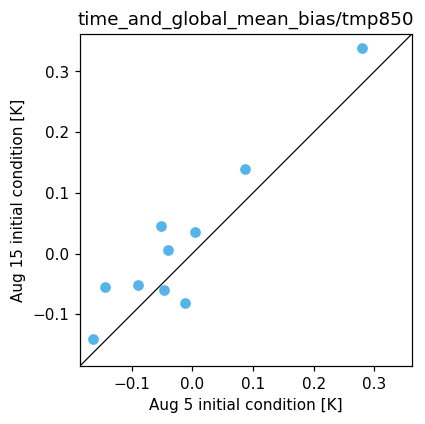

In [6]:
plot_scatter(ds['time_and_global_mean_bias/tmp850'])

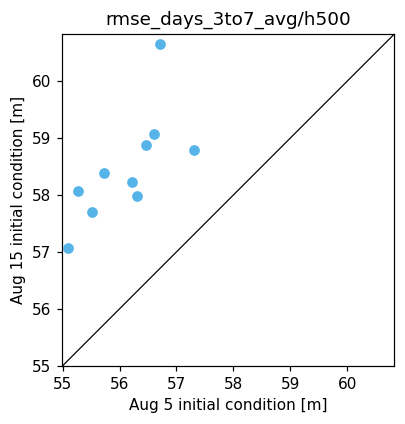

In [7]:
plot_scatter(ds['rmse_days_3to7_avg/h500'])

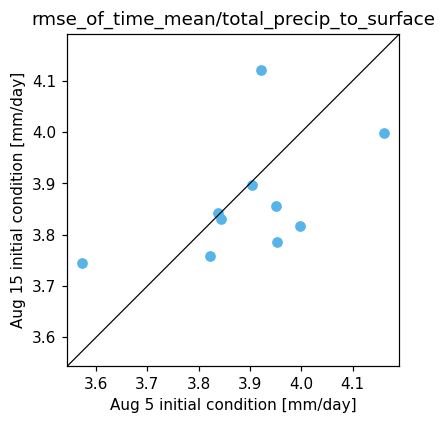

In [8]:
plot_scatter(ds['rmse_of_time_mean/total_precip_to_surface'])

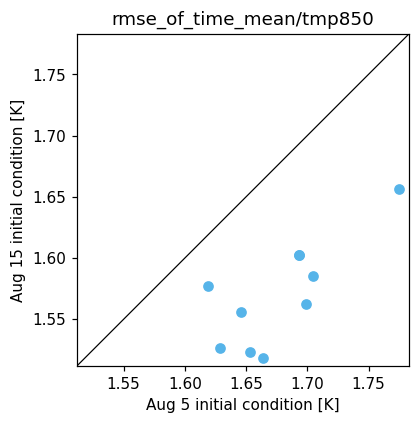

In [9]:
plot_scatter(ds['rmse_of_time_mean/tmp850'])